<a href="https://colab.research.google.com/github/69421/mbacke2801/blob/main/Lab_17_Bubble_Plots_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
#!pip install pandas
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-06-05 17:15:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  50.9MB/s    in 3.0s    

2025-06-05 17:15:27 (50.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


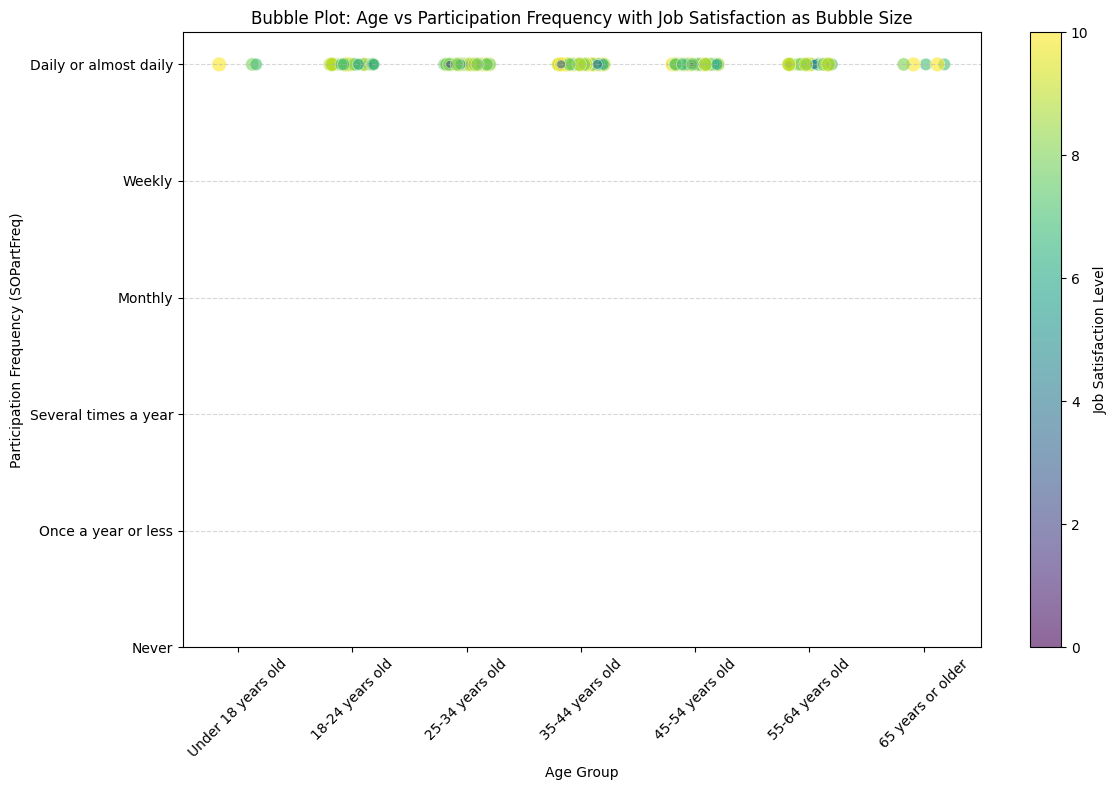

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Nettoyer les données (Clean the data)
df_clean = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Définir l'ordre des groupes d'âge (Define the order of age groups)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Filtrer les âges valides (Filter valid ages)
df_clean = df_clean[df_clean['Age'].isin(age_order)]

# Convertir en catégories ordonnées pour l'affichage (Convert to ordered categories for display)
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Convertir SOPartFreq en catégorie ordonnée si ce n'est pas déjà fait
# Exemple d'ordre pour SOPartFreq, à adapter selon tes données
# Convert SOPartFreq to ordered category if not already done
# Example order for SOPartFreq, adapt according to your data
freq_order = [
    'Never',
    'Once a year or less',
    'Several times a year',
    'Monthly',
    'Weekly',
    'Daily or almost daily'
]
df_clean = df_clean[df_clean['SOPartFreq'].isin(freq_order)]
df_clean['SOPartFreq'] = pd.Categorical(df_clean['SOPartFreq'], categories=freq_order, ordered=True)

# Créer une colonne pour la taille des bulles basée sur JobSat (normaliser pour éviter tailles trop grandes)
# Create a column for bubble size based on JobSat (normalize to avoid too large sizes)
job_sat_min = df_clean['JobSat'].min()
job_sat_max = df_clean['JobSat'].max()
df_clean['BubbleSize'] = 100 * (df_clean['JobSat'] - job_sat_min) / (job_sat_max - job_sat_min) + 10  # taille min=10 # min size = 10

# Pour jitter horizontal (transformer âge en numéro + bruit)
# For horizontal jitter (transform age to number + noise)
age_to_num = {age: i for i, age in enumerate(age_order)}
df_clean['AgeNumJitter'] = df_clean['Age'].map(age_to_num).astype(float) + np.random.uniform(-0.2, 0.2, size=len(df_clean))

# Convertir SOPartFreq en numéro pour y (Convert SOPartFreq to number for y)
freq_to_num = {freq: i for i, freq in enumerate(freq_order)}
df_clean['FreqNum'] = df_clean['SOPartFreq'].map(freq_to_num)

# Plot bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df_clean['AgeNumJitter'],
    y=df_clean['FreqNum'],
    s=df_clean['BubbleSize'],
    alpha=0.6,
    c=df_clean['JobSat'],  # couleur selon JobSat # color according to JobSat
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.yticks(ticks=range(len(freq_order)), labels=freq_order)
plt.xlabel('Age Group')
plt.ylabel('Participation Frequency (SOPartFreq)')
plt.title('Bubble Plot: Age vs Participation Frequency with Job Satisfaction as Bubble Size')
plt.colorbar(scatter, label='Job Satisfaction Level')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


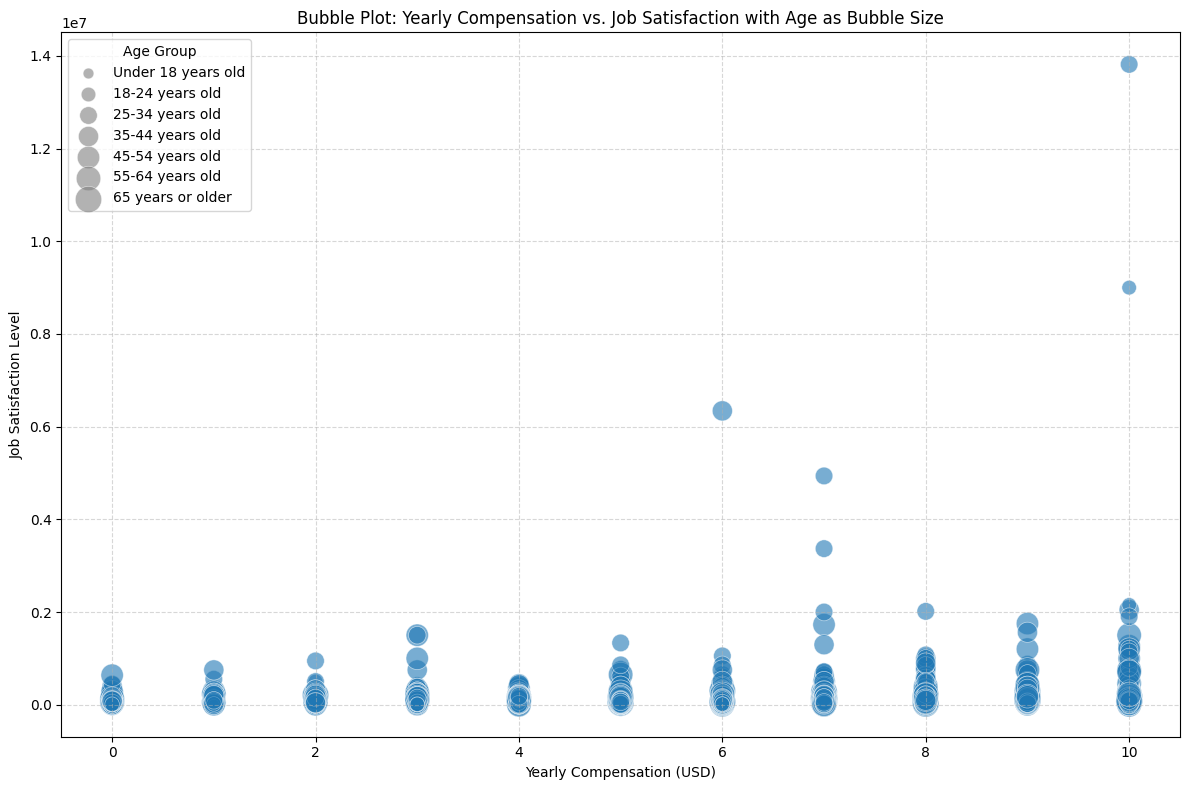

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Clean data, removing rows with missing values in the relevant columns
df_clean_comp = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age']).copy() # Add .copy() here

# Filter valid age groups (using the same order as before for consistency)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df_clean_comp = df_clean_comp[df_clean_comp['Age'].isin(age_order)].copy() # Add .copy() here

# Create a numerical representation of age groups for bubble size
age_to_num = {age: i for i, age in enumerate(age_order)}
df_clean_comp.loc[:, 'AgeNum'] = df_clean_comp['Age'].map(age_to_num) + 1 # Use .loc

# Scale the age number for better visualization
df_clean_comp.loc[:, 'BubbleSize'] = df_clean_comp['AgeNum'] * 50 + 10 # Use .loc

# Create the bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df_clean_comp['JobSat'],
    y=df_clean_comp['ConvertedCompYearly'],
    s=df_clean_comp['BubbleSize'],
    alpha=0.6,
    # Removed 'c=df_clean_comp['AgeNum']' to not color by age
    edgecolors='w',
    linewidth=0.5
)

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Level')
plt.title('Bubble Plot: Yearly Compensation vs. Job Satisfaction with Age as Bubble Size')

# Create a legend for bubble sizes based on age groups
for age, num in age_to_num.items():
    plt.scatter([], [], s=(num + 1) * 50 + 10, label=age, color='gray', alpha=0.6, edgecolors='w', linewidth=0.5)

plt.legend(title='Age Group')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



<ipython-input-12-64e6abf58630>:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


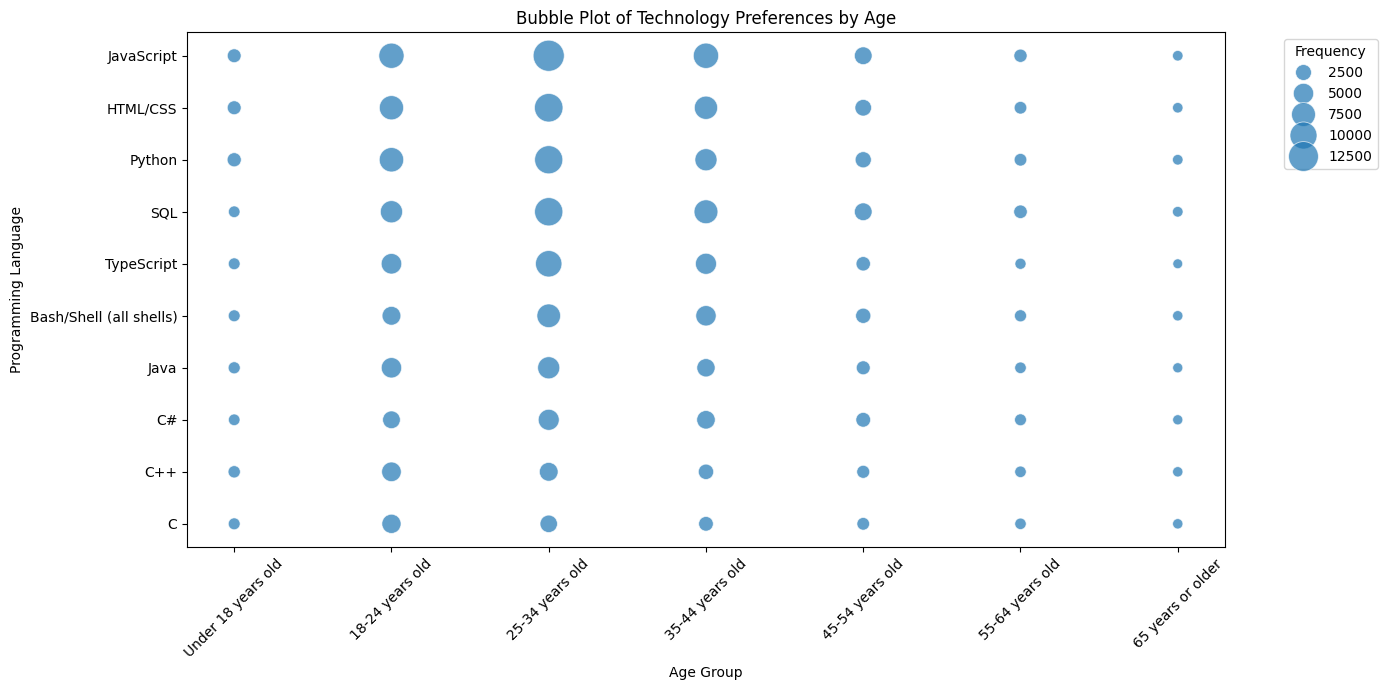

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que ton DataFrame s'appelle df et contient Age et LanguageHaveWorkedWith
# Exploser les langages en lignes séparées
df_expanded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Compter les occurrences par âge et langage
language_age_counts = df_expanded.groupby(['Age', 'Language']).size().reset_index(name='Count')

# Garder uniquement les langages les plus fréquents (ex: top 10)
top_languages = language_age_counts.groupby('Language')['Count'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filtrer et faire une copie explicite pour éviter warning
language_age_counts = language_age_counts[language_age_counts['Language'].isin(top_languages)].copy()

# Définir l'ordre des catégories pour Age (tu peux ajuster selon tes données)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Transformer Age et Language en catégories ordonnées pour un affichage clair
language_age_counts['Age'] = pd.Categorical(language_age_counts['Age'], categories=age_order, ordered=True)
language_age_counts['Language'] = pd.Categorical(language_age_counts['Language'], categories=top_languages, ordered=True)

# Tracer le bubble plot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=language_age_counts,
    x='Age',
    y='Language',
    size='Count',
    sizes=(50, 500),
    alpha=0.7,
    legend='brief',
    palette='muted'
)
plt.title('Bubble Plot of Technology Preferences by Age')
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.xticks(rotation=45)
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


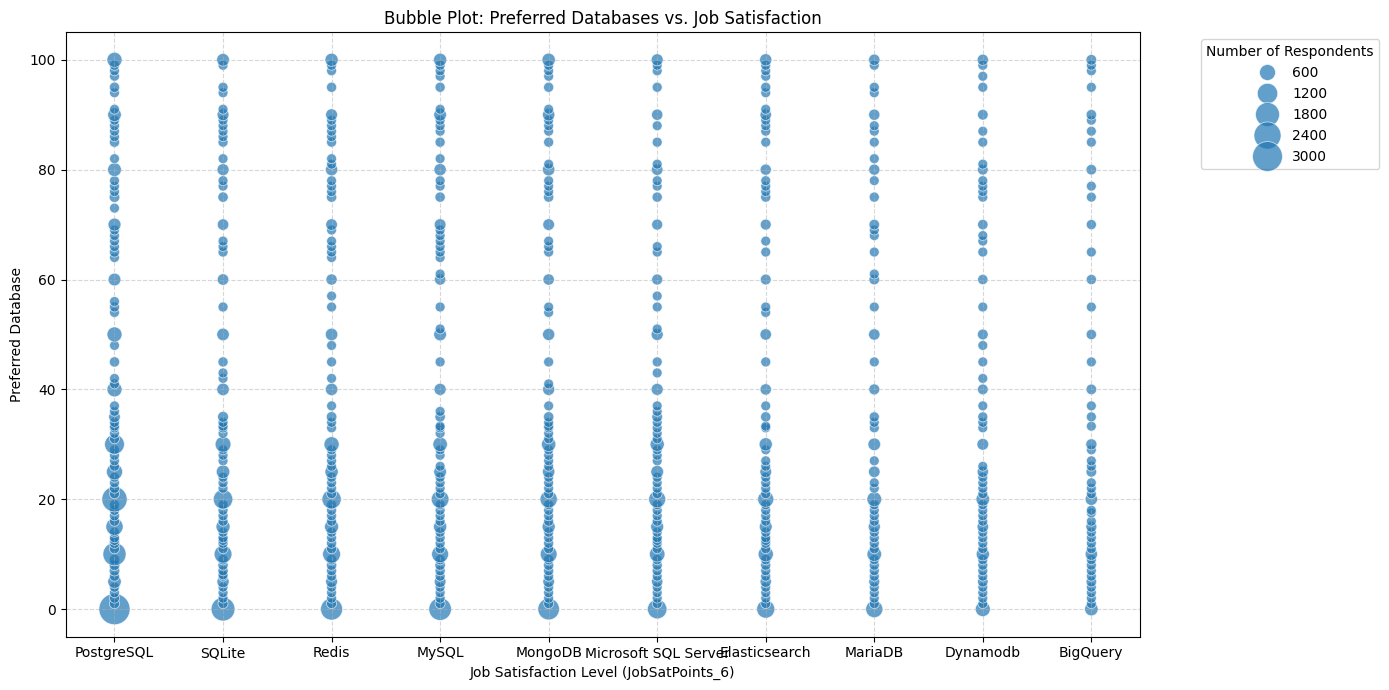

In [14]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que ton DataFrame s'appelle df et contient les colonnes :
# 'DatabaseWantToWorkWith' (string avec bases de données séparées par ';')
# 'JobSatPoints_6' (niveau de satisfaction au travail, numérique)

# Nettoyer données manquantes
df_clean = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSatPoints_6']).copy()

# Exploser les bases de données (une base par ligne)
df_expanded = df_clean.assign(Database=df_clean['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Nettoyer espaces autour des noms (optionnel mais recommandé)
df_expanded['Database'] = df_expanded['Database'].str.strip()

# Regrouper par base de données et niveau de satisfaction au travail, compter les réponses
db_job_sat_counts = df_expanded.groupby(['Database', 'JobSatPoints_6']).size().reset_index(name='Count')

# Pour alléger la visualisation, on peut garder uniquement les bases les plus populaires
top_dbs = db_job_sat_counts.groupby('Database')['Count'].sum().sort_values(ascending=False).head(10).index.tolist()
db_job_sat_counts = db_job_sat_counts[db_job_sat_counts['Database'].isin(top_dbs)].copy()

# Trier les bases de données pour affichage
db_job_sat_counts['Database'] = pd.Categorical(db_job_sat_counts['Database'], categories=top_dbs, ordered=True)

# Tracer le bubble plot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=db_job_sat_counts,
    x='Database',
    y='JobSatPoints_6',
    size='Count',
    sizes=(50, 500),
    alpha=0.7,
    legend='brief'
)

plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Preferred Database')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


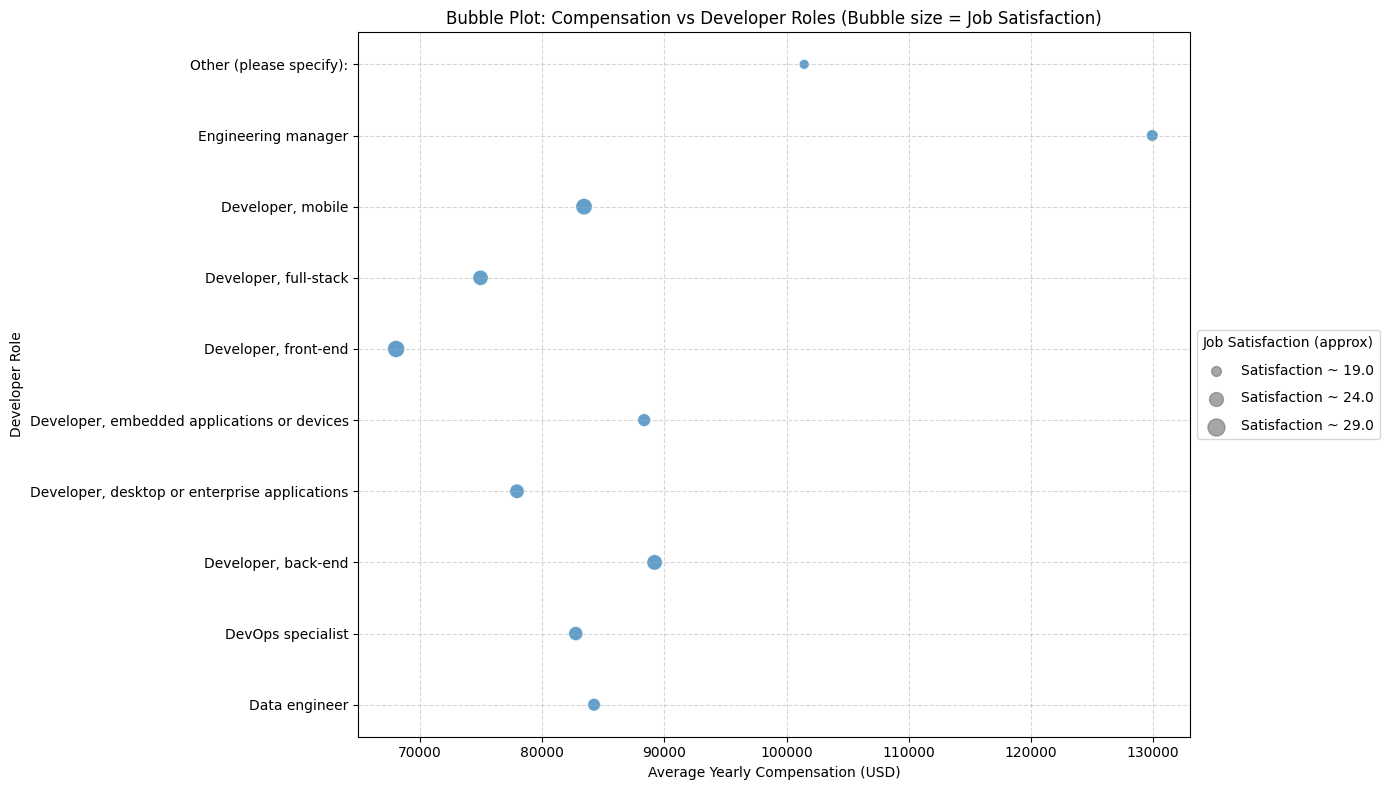

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que ton DataFrame s'appelle df et contient les colonnes :
# 'ConvertedCompYearly', 'DevType', 'JobSatPoints_6'

df_clean = df.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSatPoints_6']).copy()

df_expanded = df_clean.assign(DevType=df_clean['DevType'].str.split(';')).explode('DevType')
df_expanded['DevType'] = df_expanded['DevType'].str.strip()

top_roles = df_expanded['DevType'].value_counts().head(10).index.tolist()
df_expanded = df_expanded[df_expanded['DevType'].isin(top_roles)].copy()

grouped = df_expanded.groupby('DevType').agg({
    'ConvertedCompYearly': 'mean',
    'JobSatPoints_6': 'mean',
    'DevType': 'count'
}).rename(columns={'DevType': 'Count'}).reset_index()

job_sat_min = grouped['JobSatPoints_6'].min()
job_sat_max = grouped['JobSatPoints_6'].max()
grouped['BubbleSize'] = 100 * (grouped['JobSatPoints_6'] - job_sat_min) / (job_sat_max - job_sat_min) + 50

plt.figure(figsize=(14, 8))

scatter = plt.scatter(
    grouped['ConvertedCompYearly'],
    grouped['DevType'],
    s=grouped['BubbleSize'],
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)

plt.title('Bubble Plot: Compensation vs Developer Roles (Bubble size = Job Satisfaction)')
plt.xlabel('Average Yearly Compensation (USD)')
plt.ylabel('Developer Role')
plt.grid(True, linestyle='--', alpha=0.5)

# Création légende taille bulles
for size in [50, 100, 150]:
    plt.scatter([], [], s=size, c='gray', alpha=0.7, label=f'Satisfaction ~ {int((size-50)/(150-50)*(job_sat_max-job_sat_min) + job_sat_min):.1f}')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Job Satisfaction (approx)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


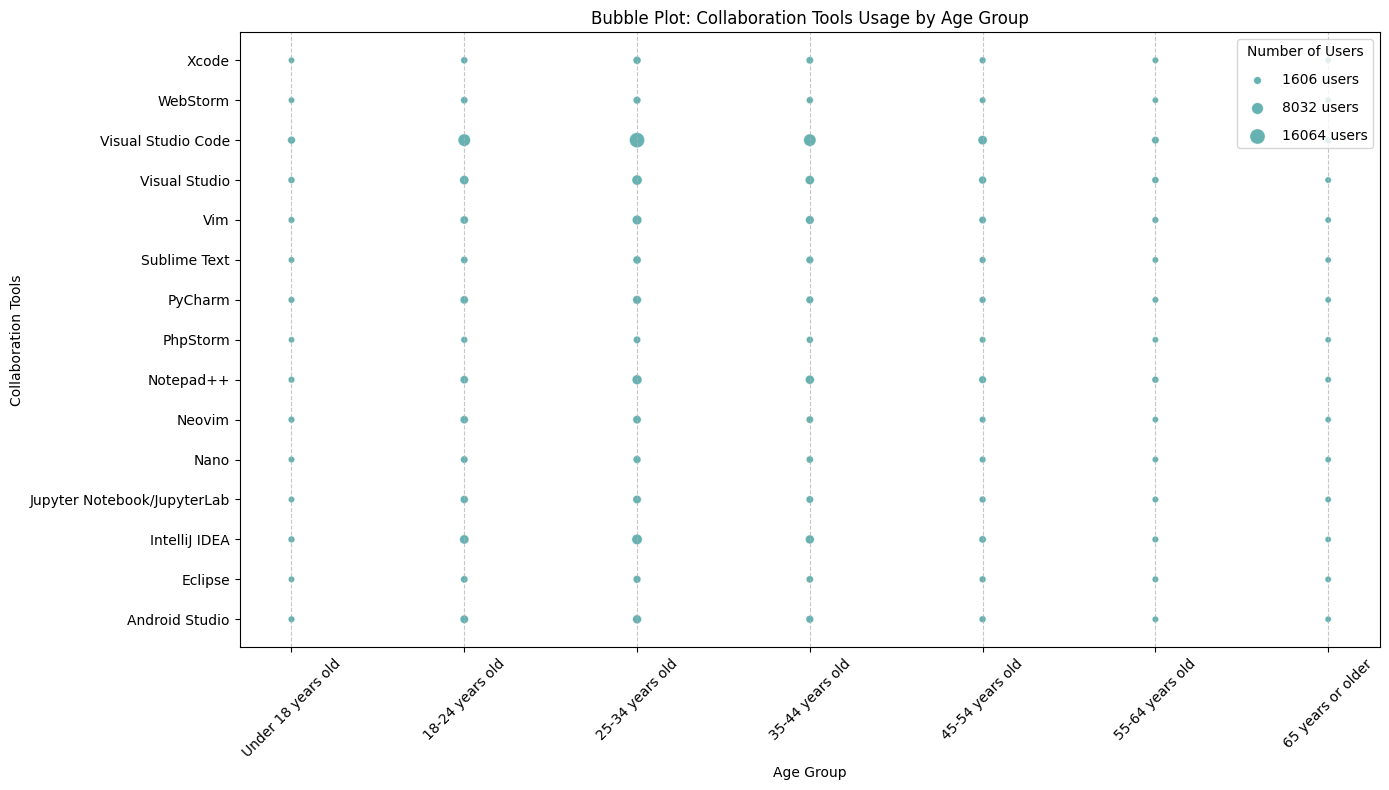

In [22]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supposons que df est ton DataFrame avec 'Age' et 'NEWCollabToolsHaveWorkedWith'

# 1. Nettoyer les données : enlever les valeurs manquantes
df_clean = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith']).copy()

# 2. Exploser les outils (séparés par ';')
df_clean['ToolsList'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df_clean.explode('ToolsList')
df_exploded['ToolsList'] = df_exploded['ToolsList'].str.strip()

# 3. Compter la fréquence par Age et outil
freq_table = df_exploded.groupby(['Age', 'ToolsList']).size().reset_index(name='Count')

# 4. Optionnel : ordonner les catégories d'âge si besoin
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
freq_table['Age'] = pd.Categorical(freq_table['Age'], categories=age_order, ordered=True)

# 5. Pour mieux visualiser : réduire le nombre d'outils affichés (ex: top 15)
top_tools = freq_table.groupby('ToolsList')['Count'].sum().sort_values(ascending=False).head(15).index
freq_table = freq_table[freq_table['ToolsList'].isin(top_tools)]

# 6. Créer des numéros pour x (Age) et y (Tools) pour pouvoir scatter plot
age_to_num = {age: i for i, age in enumerate(age_order)}
tools_order = freq_table['ToolsList'].unique()
tool_to_num = {tool: i for i, tool in enumerate(tools_order)}

freq_table['AgeNum'] = freq_table['Age'].map(age_to_num)
freq_table['ToolNum'] = freq_table['ToolsList'].map(tool_to_num)

# 7. Normaliser la taille des bulles pour la visibilité
max_count = freq_table['Count'].max()
freq_table['BubbleSize'] = 100 * freq_table['Count'] / max_count + 20  # taille min 20

# 8. Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    freq_table['AgeNum'],
    freq_table['ToolNum'],
    s=freq_table['BubbleSize'],
    alpha=0.6,
    color='teal',
    edgecolors='w',
    linewidth=0.5
)

plt.yticks(ticks=list(tool_to_num.values()), labels=list(tool_to_num.keys()))
plt.xticks(ticks=list(age_to_num.values()), labels=list(age_to_num.keys()), rotation=45)

plt.xlabel('Age Group')
plt.ylabel('Collaboration Tools')
plt.title('Bubble Plot: Collaboration Tools Usage by Age Group')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Légende taille bulles
for size in [30, 70, 120]:
    plt.scatter([], [], s=size, c='teal', alpha=0.6, edgecolors='w', linewidth=0.5,
                label=f'{int((size-20) / 100 * max_count)} users')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Number of Users', loc='upper right')

plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



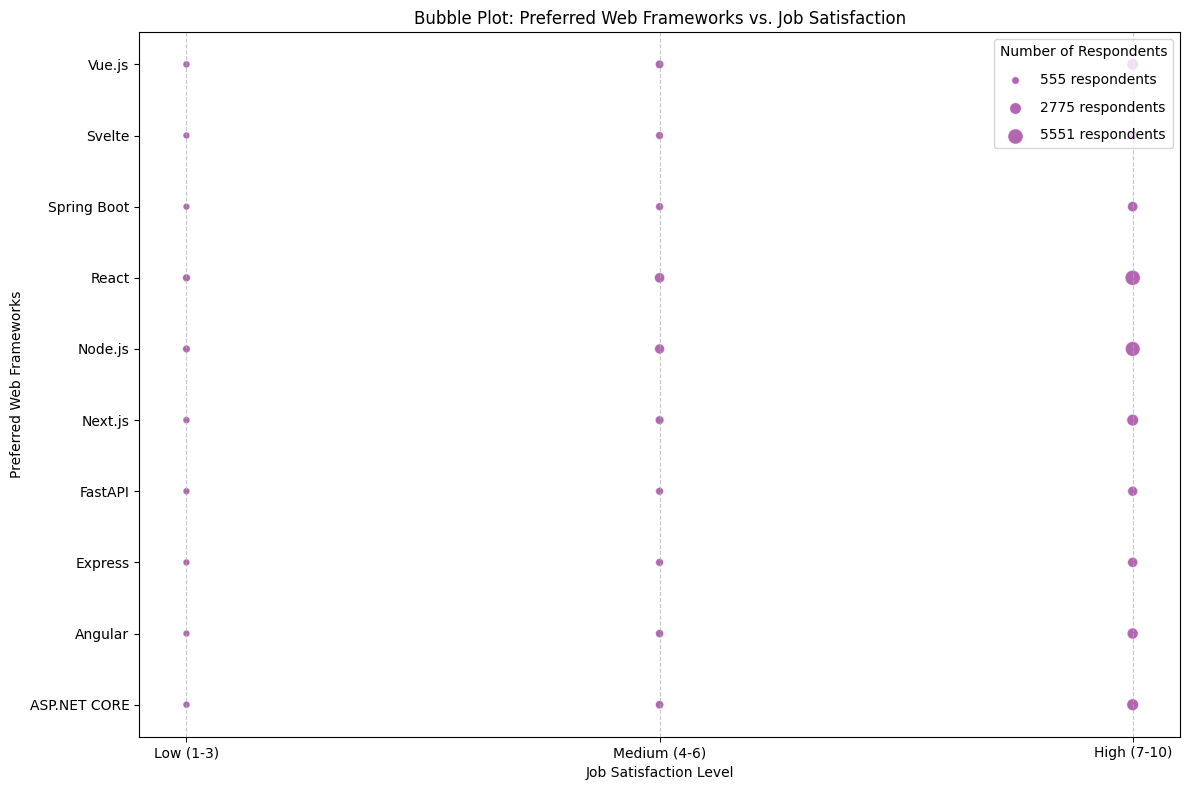

In [23]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supposons que ton DataFrame s'appelle df et contient 'WebframeWantToWorkWith' et 'JobSat'

# 1. Nettoyer les données (enlever valeurs manquantes)
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat']).copy()

# 2. Exploser la colonne des frameworks (séparés par ';')
df_clean['FrameworkList'] = df_clean['WebframeWantToWorkWith'].str.split(';')
df_exploded = df_clean.explode('FrameworkList')
df_exploded['FrameworkList'] = df_exploded['FrameworkList'].str.strip()

# 3. Grouper la satisfaction en 3 catégories (exemple)
def categorize_satisfaction(score):
    if score <= 3:
        return 'Low (1-3)'
    elif score <= 6:
        return 'Medium (4-6)'
    else:
        return 'High (7-10)'

df_exploded['JobSatGroup'] = df_exploded['JobSat'].apply(categorize_satisfaction)

# 4. Compter les occurrences par framework et satisfaction
freq_table = df_exploded.groupby(['FrameworkList', 'JobSatGroup']).size().reset_index(name='Count')

# 5. Pour un affichage clair, on peut filtrer les frameworks les plus populaires (top 10 par total)
top_frameworks = freq_table.groupby('FrameworkList')['Count'].sum().sort_values(ascending=False).head(10).index
freq_table = freq_table[freq_table['FrameworkList'].isin(top_frameworks)]

# 6. Mapper les axes (framework sur y, satisfaction sur x)
job_sat_order = ['Low (1-3)', 'Medium (4-6)', 'High (7-10)']
freq_table['JobSatNum'] = freq_table['JobSatGroup'].map({k: i for i, k in enumerate(job_sat_order)})

framework_order = freq_table['FrameworkList'].unique()
framework_to_num = {fw: i for i, fw in enumerate(framework_order)}
freq_table['FrameworkNum'] = freq_table['FrameworkList'].map(framework_to_num)

# 7. Normaliser taille des bulles
max_count = freq_table['Count'].max()
freq_table['BubbleSize'] = 100 * freq_table['Count'] / max_count + 20  # taille min 20

# 8. Plot
plt.figure(figsize=(12, 8))
plt.scatter(
    freq_table['JobSatNum'],
    freq_table['FrameworkNum'],
    s=freq_table['BubbleSize'],
    alpha=0.6,
    color='purple',
    edgecolors='w',
    linewidth=0.7
)

plt.yticks(ticks=list(framework_to_num.values()), labels=list(framework_to_num.keys()))
plt.xticks(ticks=list(range(len(job_sat_order))), labels=job_sat_order)
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Preferred Web Frameworks')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Légende pour la taille des bulles
for size in [30, 70, 120]:
    plt.scatter([], [], s=size, c='purple', alpha=0.6, edgecolors='w', linewidth=0.7,
                label=f'{int((size-20) / 100 * max_count)} respondents')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Number of Respondents', loc='upper right')

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



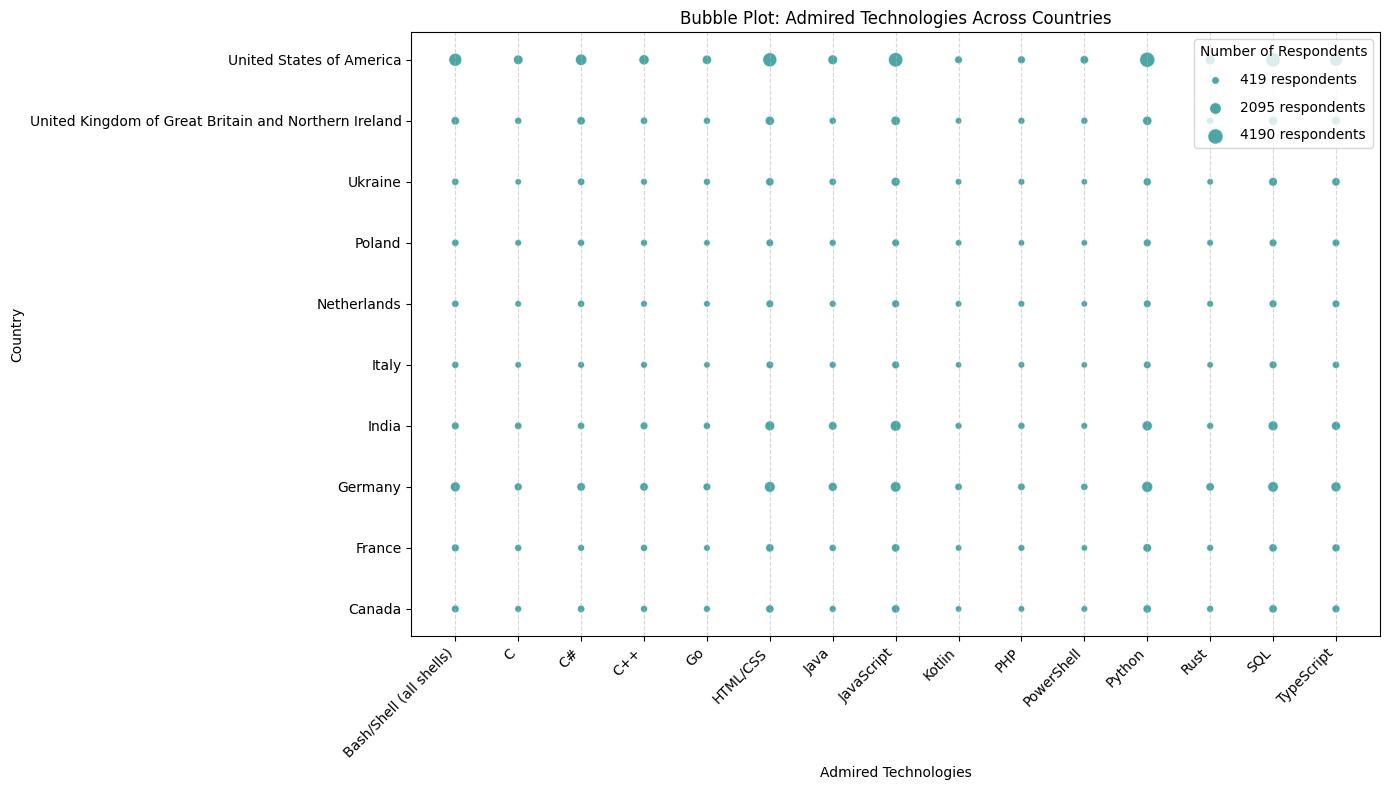

In [24]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supposons que ton DataFrame s'appelle df et contient 'LanguageAdmired' et 'Country'

# 1. Nettoyer les données
df_clean = df.dropna(subset=['LanguageAdmired', 'Country']).copy()

# 2. Séparer les technologies admirées (en liste)
df_clean['TechList'] = df_clean['LanguageAdmired'].str.split(';')
df_exploded = df_clean.explode('TechList')
df_exploded['TechList'] = df_exploded['TechList'].str.strip()

# 3. Compter le nombre de fois où chaque technologie est admirée dans chaque pays
freq_table = df_exploded.groupby(['Country', 'TechList']).size().reset_index(name='Count')

# 4. Filtrer les technologies les plus populaires pour clarté (top 15)
top_techs = freq_table.groupby('TechList')['Count'].sum().sort_values(ascending=False).head(15).index
freq_table = freq_table[freq_table['TechList'].isin(top_techs)]

# 5. Filtrer aussi les pays les plus représentés (top 10)
top_countries = freq_table.groupby('Country')['Count'].sum().sort_values(ascending=False).head(10).index
freq_table = freq_table[freq_table['Country'].isin(top_countries)]

# 6. Mapper axes
tech_order = freq_table['TechList'].unique()
tech_to_num = {tech: i for i, tech in enumerate(tech_order)}
freq_table['TechNum'] = freq_table['TechList'].map(tech_to_num)

country_order = freq_table['Country'].unique()
country_to_num = {country: i for i, country in enumerate(country_order)}
freq_table['CountryNum'] = freq_table['Country'].map(country_to_num)

# 7. Normaliser taille des bulles (plus lisible)
max_count = freq_table['Count'].max()
freq_table['BubbleSize'] = 100 * freq_table['Count'] / max_count + 20  # taille min 20

# 8. Tracer
plt.figure(figsize=(14, 8))
plt.scatter(
    freq_table['TechNum'],
    freq_table['CountryNum'],
    s=freq_table['BubbleSize'],
    alpha=0.7,
    color='teal',
    edgecolors='w',
    linewidth=0.7
)

plt.xticks(ticks=list(tech_to_num.values()), labels=list(tech_to_num.keys()), rotation=45, ha='right')
plt.yticks(ticks=list(country_to_num.values()), labels=list(country_to_num.keys()))
plt.xlabel('Admired Technologies')
plt.ylabel('Country')
plt.title('Bubble Plot: Admired Technologies Across Countries')

plt.grid(axis='x', linestyle='--', alpha=0.5)

# Légende pour la taille des bulles
for size in [30, 70, 120]:
    plt.scatter([], [], s=size, c='teal', alpha=0.7, edgecolors='w', linewidth=0.7,
                label=f'{int((size-20)/100 * max_count)} respondents')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Number of Respondents', loc='upper right')

plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
